In [40]:
import sys
sys.path.append('../src/')
from tqdm import tqdm
import pandas as pd
import wandb
import asyncio
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


In [41]:

api = wandb.Api()
entity, project = "ajzero", "AlphaZero"
x_metric = "planning_budget"
tags = ['2024-04-12-12-19-59']
filters = {"tags": {"$in": tags}}
runs = api.runs(entity + "/" + project, filters=filters)
runs

<Runs ajzero/AlphaZero>

In [42]:
# crete a dataframe from runs and summary metrics

data = []
for run in tqdm(runs):
    summary = run.summary._json_dict
    config = run.config
    summary.update(config)
    data.append(summary)

df = pd.DataFrame(data)

df


100%|██████████| 27/27 [00:00<00:00, 36425.28it/s]


,Training/Value_and_Policy_loss,episodes,Evaluation/Discounted_Returns,Self_Play/Mean_Entropy,Training/Replay_Buffer_Size,Self_Play/Mean_Discounted_Return,Training/Learning_Rate,Evaluation/Timesteps,Self_Play/Mean_Return,Self_Play/Total_Mean_Discounted_Return,...,policy_loss_weight,sample_batch_ratio,tree_value_transform,observation_embedding,regularization_weight,root_selection_policy,episodes_per_iteration,tree_evaluation_policy,replay_buffer_multiplier,selection_value_transform
0,0.376541,120,"{'values': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0.652460,60,0.336420,0.001,"{'values': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1.000000,0.303214,...,0.3,1,identity,coordinate,0.0001,PolicyUCT,6,mvc,10,identity
1,0.377252,120,"{'_type': 'histogram', 'bins': [-0.45289874076...",0.731094,60,0.278733,0.001,"{'_type': 'histogram', 'bins': [29.5, 29.51562...",1.000000,0.224644,...,0.3,1,identity,coordinate,0.0001,UCT,6,mvc,10,identity
2,0.433728,120,"{'_type': 'histogram', 'bins': [-0.15132164955...",0.852850,60,0.318295,0.001,"{'bins': [10.5, 10.515625, 10.53125, 10.546875...",1.000000,0.078257,...,0.3,1,identity,coordinate,0.0001,UCT,6,visit,10,identity
3,0.380911,120,"{'_type': 'histogram', 'bins': [0.090489923954...",0.680587,60,0.307531,0.001,"{'bins': [5.5, 5.515625, 5.53125, 5.546875, 5....",1.000000,0.277992,...,0.3,1,identity,coordinate,0.0001,PolicyUCT,6,mvc,10,identity
4,0.383481,120,"{'bins': [-0.3332282602787018, -0.317603260278...",0.692711,60,0.291199,0.001,"{'bins': [17.5, 17.515625, 17.53125, 17.546875...",1.000000,0.215523,...,0.3,1,identity,coordinate,0.0001,UCT,6,mvc,10,identity
5,0.508894,120,"{'_type': 'histogram', 'values': [0, 0, 0, 0, ...",0.873947,60,-0.142406,0.001,"{'_type': 'histogram', 'values': [0, 0, 0, 0, ...",-0.333333,-0.123789,...,0.3,1,identity,coordinate,0.0001,UCT,6,visit,10,identity
6,0.393470,120,"{'_type': 'histogram', 'bins': [0.031440913677...",0.611709,60,0.265309,0.001,"{'_type': 'histogram', 'bins': [6.5, 6.515625,...",1.000000,0.220929,...,0.3,1,identity,coordinate,0.0001,PolicyUCT,6,mvc,10,identity
7,0.380083,120,"{'_type': 'histogram', 'bins': [-0.02170318365...",0.704414,60,0.217929,0.001,"{'_type': 'histogram', 'bins': [7.5, 7.515625,...",1.000000,0.172392,...,0.3,1,identity,coordinate,0.0001,UCT,6,mvc,10,identity
8,0.507325,120,"{'bins': [-0.49820297956466675, -0.48257797956...",0.965214,60,-0.416745,0.001,"{'_type': 'histogram', 'bins': [60.5, 60.51562...",-0.666667,-0.273916,...,0.3,1,identity,coordinate,0.0001,UCT,6,visit,10,identity
9,0.381987,120,"{'_type': 'histogram', 'bins': [0.090489923954...",0.601285,60,0.523517,0.001,"{'bins': [5.5, 5.515625, 5.53125, 5.546875, 5....",1.000000,0.299924,...,0.3,1,identity,coordinate,0.0001,PolicyUCT,6,mvc,10,identity


In [43]:
df.columns

Index(['Training/Value_and_Policy_loss', 'episodes',
       'Evaluation/Discounted_Returns', 'Self_Play/Mean_Entropy',
       'Training/Replay_Buffer_Size', 'Self_Play/Mean_Discounted_Return',
       'Training/Learning_Rate', 'Evaluation/Timesteps',
       'Self_Play/Mean_Return', 'Self_Play/Total_Mean_Discounted_Return',
       'Evaluation/Mean_Discounted_Returns', 'Self_Play/Entropies',
       'Evaluation/Returns', 'environment_steps', 'Self_Play/Min_Timesteps',
       'Self_Play/Mean_Timesteps', 'Self_Play/Total_Timesteps',
       'Training/Value_loss', '_step', 'Self_Play/Timesteps', '_timestamp',
       '_wandb', 'Evaluation/Mean_Entropy', 'Self_Play/EMA_Discounted_Return',
       '_runtime', 'Training/Policy_loss', 'Self_Play/Min_Return',
       'grad_steps', 'Training/Regularization_loss', 'Evaluation/Mean_Returns',
       'Self_Play/Max_Return', 'Training/Value_Simularities',
       'Evaluation/Entropies', 'Self_Play/Discounted_Return',
       'Self_Play/Returns', 'ncols', 'lay

In [44]:
df.discount_factor.unique()


array([0.9])

In [45]:
save_folder = 'outfiles'


def name_fn(name):
    # remove "Self_Play/" prefix if it exists
    if name.startswith("Self_Play/"):
        name = name[len("Self_Play/"):]

    # replace slash with underscore
    name = name.replace("/", "_")

    # change underscore to space
    name = name.replace("_", " ")
    return name

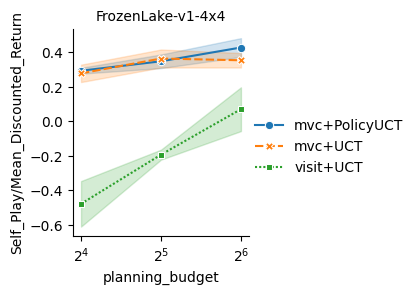

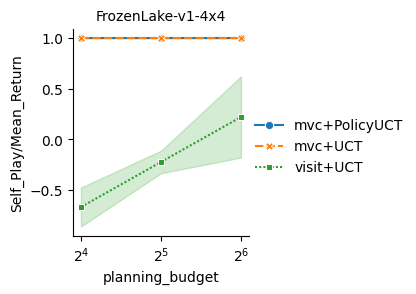

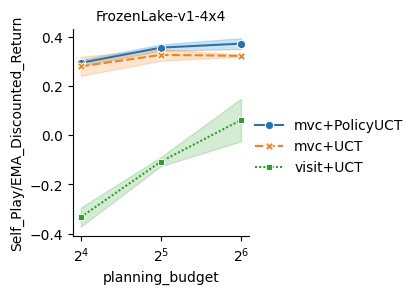

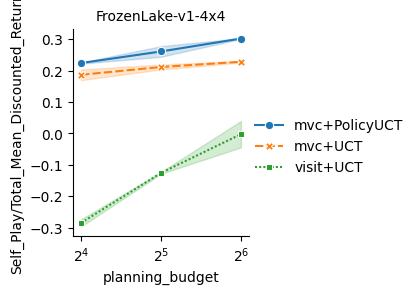

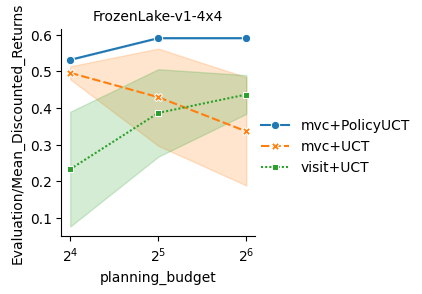

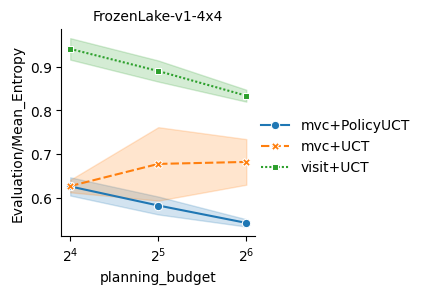

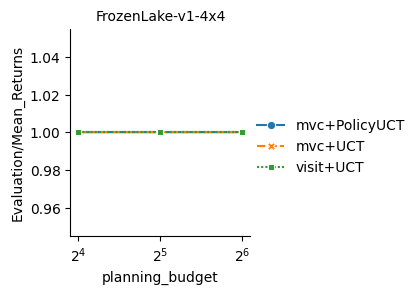

In [46]:



df['policy_combination'] = df['tree_evaluation_policy'] + "+" + df['selection_policy']


metrics = ['Self_Play/Mean_Discounted_Return','Self_Play/Mean_Return', 'Self_Play/EMA_Discounted_Return', 'Self_Play/Total_Mean_Discounted_Return',
           "Evaluation/Mean_Discounted_Returns", "Evaluation/Mean_Entropy", "Evaluation/Mean_Returns"]


estimator = "mean"
for metric in metrics:
    # Step 1: Set up the FacetGrid to create one subplot for each unique value in 'env_description'
    # Note: adjust size and aspect to fit your data and preference
    g = sns.FacetGrid(df, col="env_description",sharex=True, sharey=False)

    # Step 2: Use map_dataframe to draw the lineplots on each subplot
    # Pass sns.lineplot as the plotting function and its arguments
    g.map_dataframe(sns.lineplot,
                    x=x_metric, y=metric,
                    hue="policy_combination", style="policy_combination",
                    markers=True, errorbar="se", estimator="mean")  # adjust 'estimator' as needed

    for ax in g.axes.flatten():
        ax.set_xscale('log', base=2)

    # Step 3: Adjusting aesthetics (optional)
    # Adding a legend
    g.add_legend()

    # Set the titles for each subplot for clarity
    g.set_titles("{col_name}")

    # Adjust the labels/titles as needed
    g.set_axis_labels(x_metric, metric)

    plt.show()